# Example 6: Full suite for North America

In the previous example we mapped Te and F using the default values of crustal density and thickness. Let's examine how we can do better - and produce our final models. You will notice that this requires only a few extra steps.

<div class="alert alert-block alert-warning">
<b>Warning:</b> Be careful to ensure that all the data sets have the same grid specifications (i.e., registration, shape, sampling distance, etc.)!!
</div>

In [9]:
import numpy as np
import pandas as pd
from plateflex import TopoGrid, BougGrid, RhocGrid, ZcGrid, Project

# Read header (first line) of data set to get grid parameters
xmin, xmax, ymin, ymax, zmin, zmax, dx, dy, nx, ny = \
pd.read_csv('../data/Topo_NA.xyz', sep='\t', nrows=0).columns[1:].values.astype(float)

# Change type of nx and ny to integers
nx = int(nx); ny = int(ny)

# Read data 
topodata = pd.read_csv('../data/Topo_NA.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]
bougdata = pd.read_csv('../data/Bouguer_NA.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]

# Read data of crustal density and thickness
densdata = pd.read_csv('../data/crustal_density_NA.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]
thickdata = pd.read_csv('../data/crustal_thickness_NA.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]


All those data sets can be imported into their corresponding `Grid` objects:

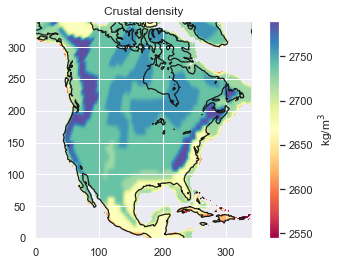

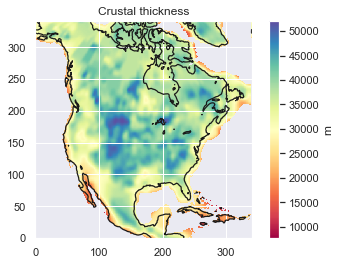

In [10]:
# Load the data as `TopoGrid` and `BougGrid` objects
topo = TopoGrid(topodata, dx, dy)
boug = BougGrid(bougdata, dx, dy)

# Create contours
contours = topo.make_contours(0.)

# Make mask 
mask = (topo.data < -500.)

# Load the crustal density and thickness as `RhocGrid` and `ZcGrid` objects
dens = RhocGrid(densdata, dx, dy)
thick = ZcGrid(thickdata, dx, dy)

# Plot the two new data sets
dens.plot(mask=mask, contours=contours, cmap='Spectral')
thick.plot(mask=mask, contours=contours, cmap='Spectral')

Define the project with new `Grid` objects, initialize it and execute!

In [39]:
# Define new project
project = Project(grids=[topo, boug, dens, thick])

# Initialize project
project.init()

# Calculate wavelet admittance and coherence
project.wlet_admit_coh()

# Make sure we are using 'L2'
project.inverse = 'L2'

# Insert mask
project.mask = mask

# Estimate flexural parameters at every 10 points of the initial grid
project.estimate_grid(10, atype='joint')

Computing: [##########] 34/34


Now we should have better estimates of Te and F - let's examine the maps!

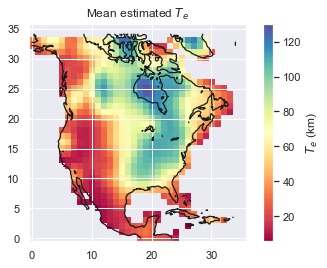

In [40]:
project.plot_results(mean_Te=True, mask=True, contours=contours, cmap='Spectral')

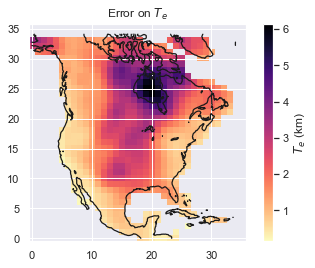

In [41]:
project.plot_results(std_Te=True, mask=True, contours=contours, cmap='magma_r')

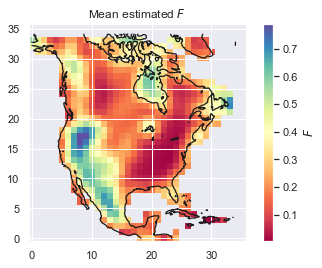

In [42]:
project.plot_results(mean_F=True, mask=True, contours=contours, cmap='Spectral')

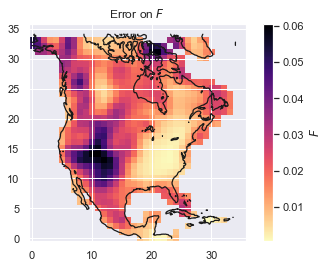

In [43]:
project.plot_results(std_F=True, mask=True, contours=contours, cmap='magma_r')

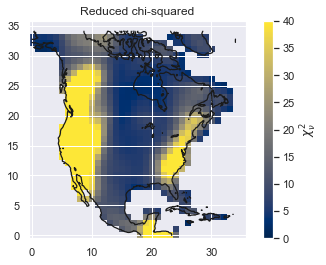

In [44]:
project.plot_results(chi2=True, mask=True, contours=contours, cmap='cividis', vmin=0, vmax=40)

Now try again with `atype='coh'` to test the effect of using a single function. After that try one more time with `atype='admit'`.

As an additional exercise, you could try using the Free-air anomaly data instead of Bouguer. I'll let you figure it out!